In [6]:
from google.colab import files
uploaded = files.upload()


Saving Advertising.csv to Advertising (1).csv


Dataset Preview:


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Mean Absolute Error: 1.4023124989385076
Mean Squared Error: 2.880023730094193
Root Mean Squared Error: 1.697063266379363


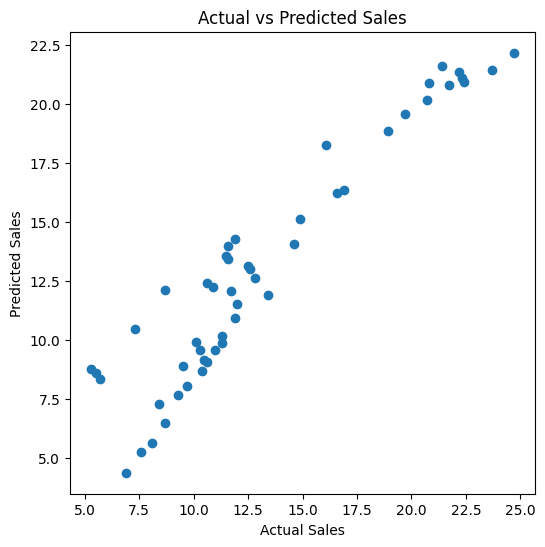


Feature Importance (Model Coefficients):


,Coefficient
TV,0.045434
Radio,0.191457
Newspaper,0.002568


In [7]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# LOAD DATA
data = pd.read_csv("Advertising.csv")
data = data.drop(columns=["Unnamed: 0"])  # remove unnecessary column

# DISPLAY FIRST ROWS
print("Dataset Preview:")
display(data.head())

# DEFINE FEATURES AND TARGET
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# SPLIT TRAIN & TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# TRAIN MODEL
model = LinearRegression()
model.fit(X_train, y_train)

# PREDICTIONS
y_pred = model.predict(X_test)

# EVALUATION
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# SHOW REAL vs PREDICTED
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

# PRINT COEFFICIENTS
print("\nFeature Importance (Model Coefficients):")
coef_df = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
display(coef_df)
